# Heart Failure Prediction - Multivariate Data Analysis

#### **Team 4:**
- Maria Leszczyńska
- Jacek Kała
- Wioletta Wielakowska
- Paulina Zaborowska
- Natalia Stępień
- Mateusz Florczyk



## Context
Heart problems are one of the main reasons many people die around the world. Each year about 17.9 million people pass away because of heart issues, which is about 31% of all deaths. Most of these deaths are because of heart attacks or strokes, and a lot of them happen to people under 70 years old. Heart failure, which happens because of heart problems, is quite common. This data has 11 things we may look at to try to predict if someone might have heart disease.

If someone has heart problems or is at risk because of things like high blood pressure, diabetes, or other diseases, it is important to find out early and manage it well. That is where a machine learning model could be really useful.

## Aim
The main goal of the project is to test the performance of various algorithms and predict whether a patient is prone to heart failure depending on multiple attributes. It is a binary classification with multiple numerical and categorical features.

## Attribute Information
- **Age**: How old the person is.
- **Sex**: Whether the person is male or female.
- **Chest Pain Type**: What kind of chest pain the person has (Typical Angina, Atypical Angina, Non-Anginal Pain, Asymptomatic).
- **Resting Blood Pressure**: Blood pressure when the person is at rest.
- **Cholesterol**: The level of cholesterol in the blood.
- **Fasting Blood Sugar**: Whether the blood sugar level is high when the person hasn't eaten (1 means high, 0 means normal).
- **Resting ECG**: Results of the heart's electrical activity test (Normal, Abnormal ST-T wave, Left Ventricular Hypertrophy).
- **Maximum Heart Rate**: The highest heart rate achieved during activity.
- **Exercise-Induced Angina**: Whether the person gets chest pain during exercise (Yes or No).
- **Oldpeak**: The higher the oldpeak value, the more likely coronary artery disease.
- **ST Slope**: The pattern of change in heart activity during exercise (Up, Flat, Down).
- **Heart Disease**: Whether the person has heart disease (1 means yes, 0 means no).

## Distribution
The code plots histograms for each feature in the data to visualize their distributions. The histograms show how many observations fall into different value ranges for each feature. The kernel density estimation (KDE) line on the histograms depicts approximate probability distributions for these features.

- **Age**: Data ranges from 28 to 77 years old. The largest group consists of individuals approximately aged 55.
- **Sex**: The number of men in this dataset is almost four times that of women. Men are also more likely to have heart disease.
- **Chest Pain Type**: The most common problem is asymptomatic chest pain (over 500 instances). Less common are non-anginal pain and atypical angina (both around 250 instances).
- **Resting Blood Pressure**: The most prevalent values vary between 120 and 140 mmHg.
- **Cholesterol**: There is a significant number of missing values depicted at 0. The rest of the cholesterol data is normally distributed with the most common result being around 210 mg/dL.
- **Fasting Blood Sugar**: Levels are normal for over 600 individuals and high for around 200 individuals.
- **Resting ECG**: Results are normal for the biggest group, with some people facing ST wave abnormalities or left ventricular hypertrophy.
- **Maximum Heart Rate**: For over 100 people, this ranges between 125 and 140 bpm.
- **Exercise-Induced Angina**: Observed in a slightly smaller number, with a positive correlation to heart disease.
- **Oldpeak**: Most people are not prone to coronary artery disease.
- **ST Slope**: Most commonly flat or up. Flat suggests normal cardiac responses to exercise, while an "up" slope may indicate myocardial ischaemia.
- **Heart Disease**: 44.71% suffer from heart disease and 55.29% of patients are healthy.


## Bibliography
- [Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)
- [Heart Failure Prediction on Kaggle](https://kaggle.com/code/tanmay111999/heart-failure-prediction-cv-score-90-5-models)
- [Heart Failure Prediction Notebook on Kaggle](https://kaggle.com/code/tanmay111999/heart-failure-prediction-cv-score-90-5-models/notebook)
- [NCBI Article](https://ncbi.nlm.nih.gov/pmc/articles/PMC5295568/)
- [How to Compare Machine Learning Models](https://robots.net/fintech/how-to-compare-machine-learning-models/)


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, RocCurveDisplay
from sklearn.pipeline import make_pipeline, Pipeline

from src import (
    DropColumnTransformer,
    OutlierRemover,
    CustomStandardScaler,
    CustomLabelEncoder,
    CustomOneHotEncoder,
    CustomMinMaxScaler,
    TargetEncoder,
    AbsTransformer,
    ZeroToNaNTransformer,
    CustomSimpleImputer
)

plt.style.use('fivethirtyeight')

In [2]:
# Load the dataset
file_path = "heart.csv"

raw_data = pd.read_csv(file_path)
raw_data.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
156,38,M,ASY,110,190,0,Normal,150,Y,1.0,Flat,1
780,64,F,ASY,180,325,0,Normal,154,Y,0.0,Up,0
489,54,M,ASY,136,220,0,Normal,140,Y,3.0,Flat,1
358,38,M,NAP,115,0,0,Normal,128,Y,0.0,Flat,1
604,68,M,NAP,134,254,1,Normal,151,Y,0.0,Up,0
266,52,M,ASY,130,298,0,Normal,110,Y,1.0,Flat,1
154,41,M,ATA,120,291,0,ST,160,N,0.0,Up,0
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
558,58,M,NAP,137,232,0,ST,124,Y,1.4,Flat,1


# Exploratory Data Analysis and Visulization

In [3]:
print(f"There are {raw_data.shape[0]} observations and {raw_data.shape[1]} columns in the dataset")

There are 918 observations and 12 columns in the dataset


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Checking for missing values
raw_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
# Checking for duplicates
raw_data.duplicated().value_counts()

False    918
Name: count, dtype: int64

In [7]:
raw_data.drop(columns=["HeartDisease"]).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


In [8]:
raw_data.describe(include=object).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [9]:
raw_data[["Cholesterol"]].value_counts()

Cholesterol
0              172
254             11
223             10
220             10
211              9
              ... 
117              1
123              1
131              1
293              1
603              1
Name: count, Length: 222, dtype: int64

In [10]:
# we may consider that patient with RestingBP = 0 is dead, so we drop this row (there is only one such a row)
raw_data[raw_data["RestingBP"] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [11]:
# raw_data redefined without this one observation
raw_data = raw_data[raw_data["RestingBP"] != 0]
raw_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


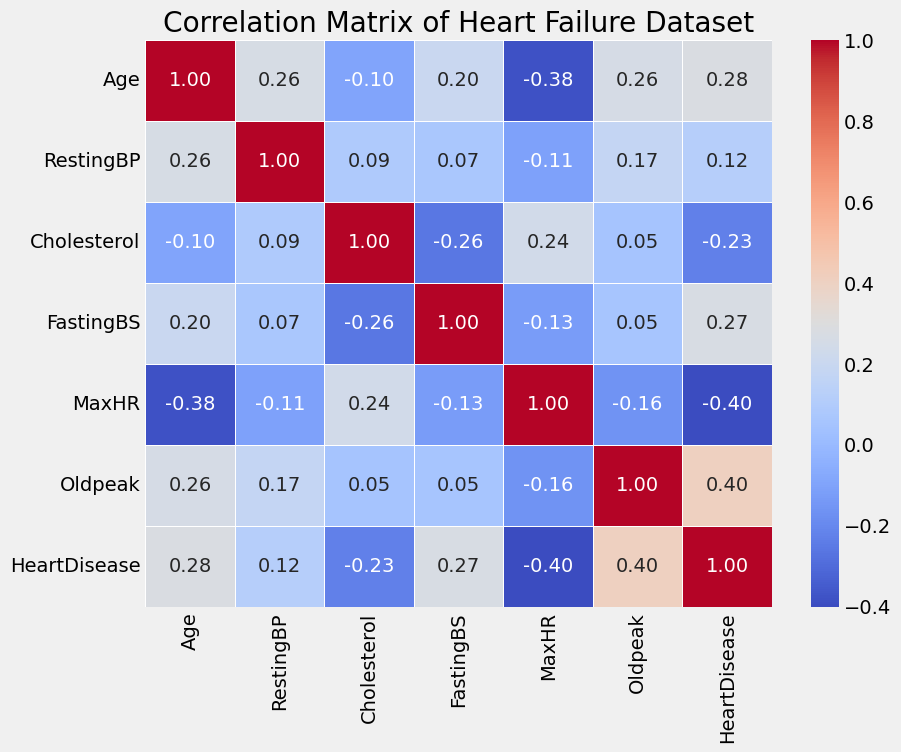

In [12]:
# Calculate correlation matrix
correlation_matrix = raw_data.corr(numeric_only=True)

# Plot correlation matrix
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Heart Failure Dataset")
plt.show()

<Figure size 1500x1000 with 0 Axes>

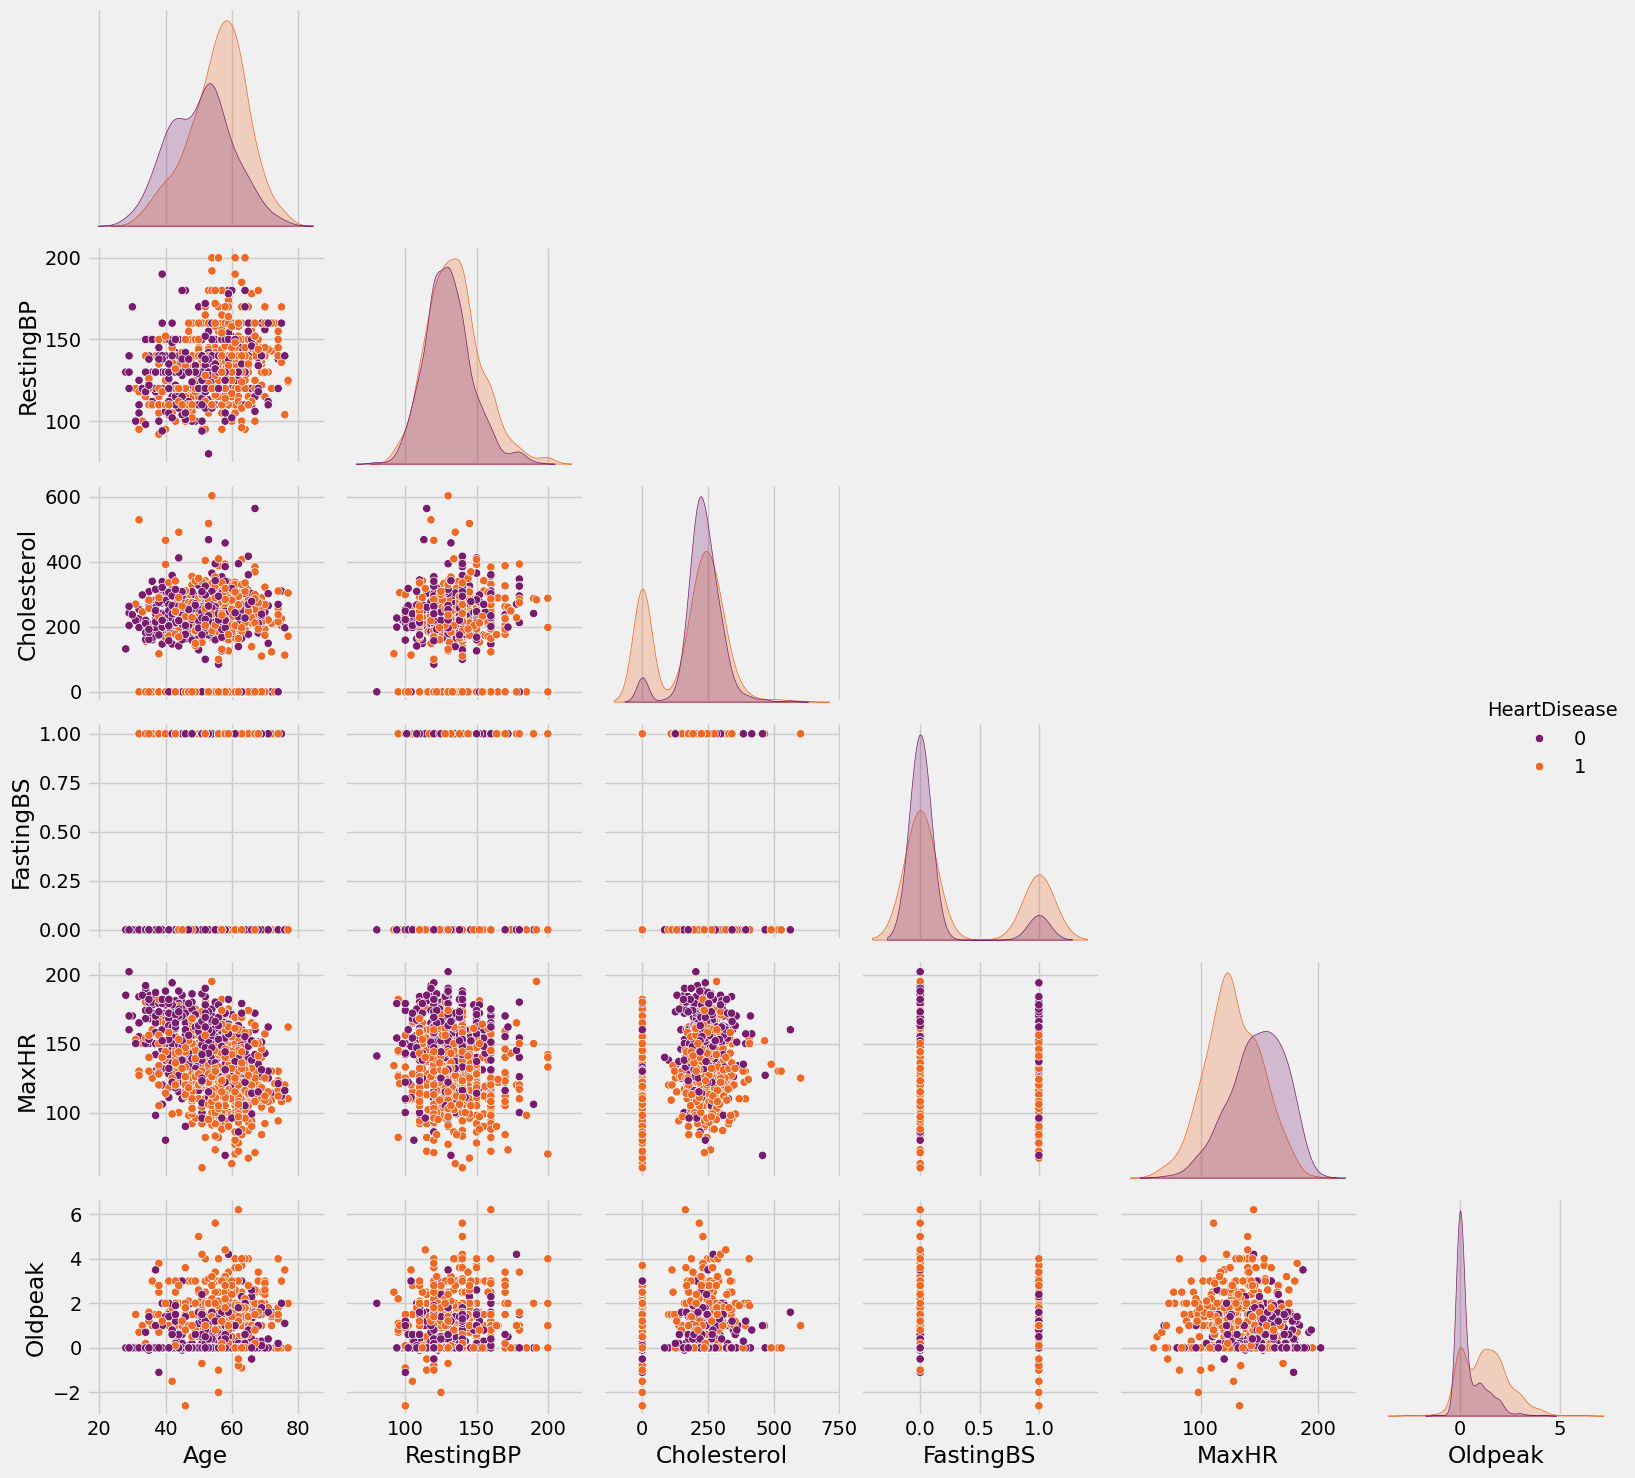

In [13]:
plt.figure(figsize=(15,10))
sns.pairplot(raw_data, hue="HeartDisease", palette="inferno", corner=True)
plt.tight_layout()
plt.show()

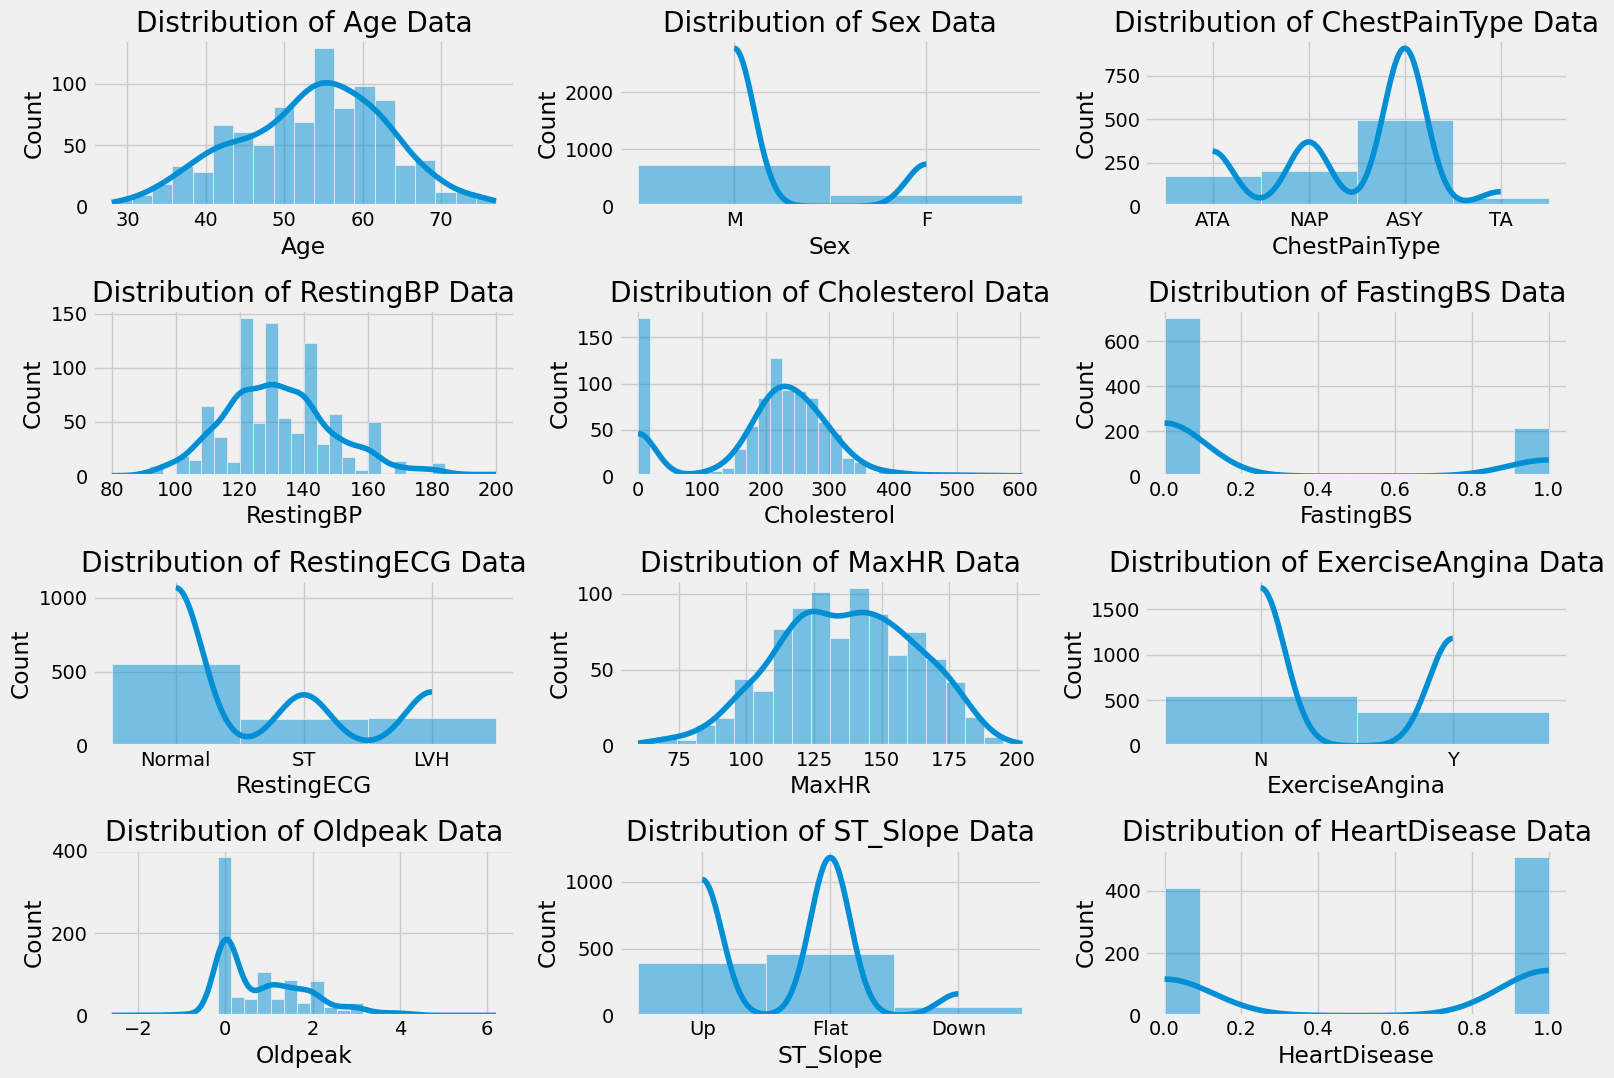

In [14]:
# Distributions of features
plt.figure(figsize=(16,11))
for i,col in enumerate(raw_data.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(raw_data[col],kde=True)
    plt.tight_layout()

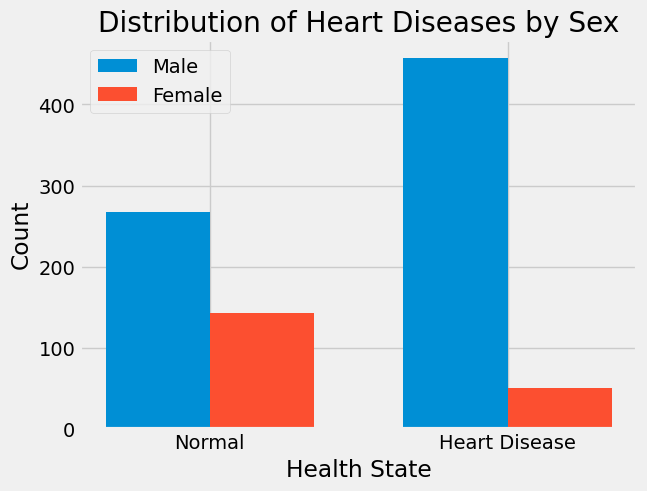

In [15]:
health_state = ('Normal', 'Heart Disease')
sexes = ('Male', 'Female')

sex_disease_df = raw_data["HeartDisease"].groupby([raw_data["Sex"], raw_data["HeartDisease"]]).size().unstack()

female_counts = np.array([sex_disease_df.loc["F", 0], sex_disease_df.loc["F", 1]])
male_counts = np.array([sex_disease_df.loc["M", 0], sex_disease_df.loc["M", 1]])

fig, ax = plt.subplots()

# Bar width
width = 0.35

# Position of bars on x-axis
x = np.arange(len(health_state))

# Plot bars
ax.bar(x - width/2, male_counts, width, label='Male')
ax.bar(x + width/2, female_counts, width, label='Female')
ax.set_xlabel('Health State')
ax.set_ylabel('Count')
ax.set_title('Distribution of Heart Diseases by Sex')
ax.set_xticks(x)
ax.set_xticklabels(health_state)
ax.legend()

plt.show()

In [16]:
healthy_or_not = raw_data["HeartDisease"].value_counts() / len(raw_data["HeartDisease"])
#print(f"{str(round(healthy_or_not[0]*100, 2)) + '%'} of people have heart disease, {str(round(healthy_or_not[1]*100, 2)) + '%'} are healthy")
print(f"{str(round(healthy_or_not[0]*100, 2))}% of people have heart disease, {str(round(healthy_or_not[1]*100, 2))}% are healthy")

44.71% of people have heart disease, 55.29% are healthy


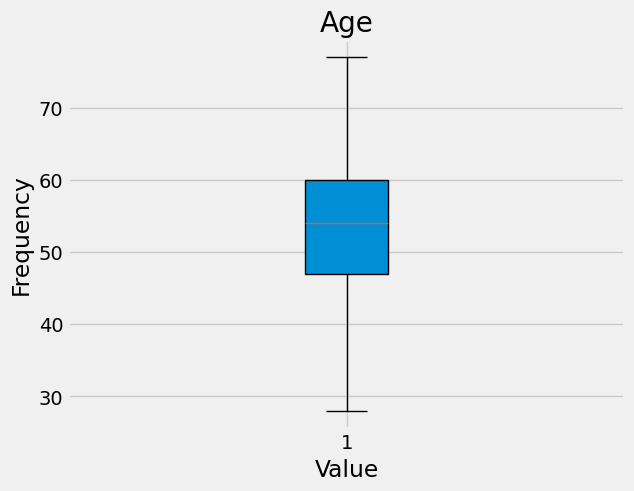

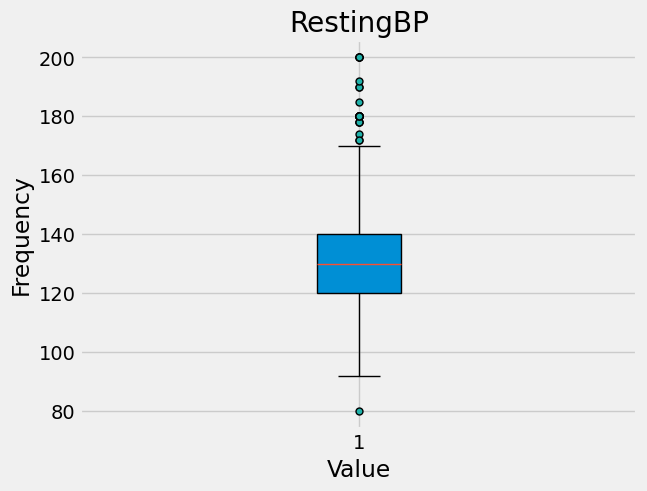

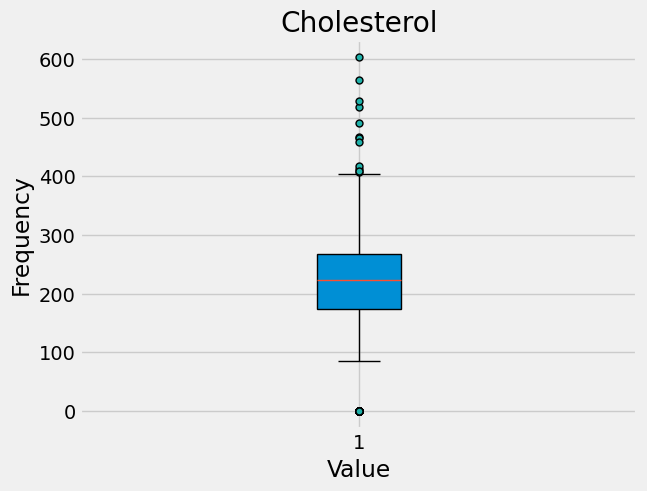

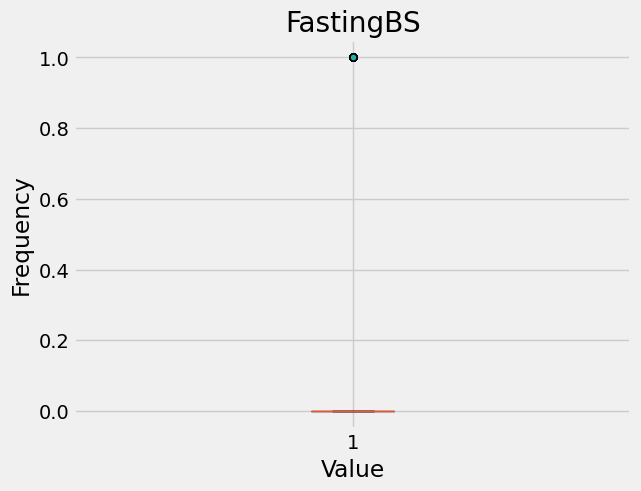

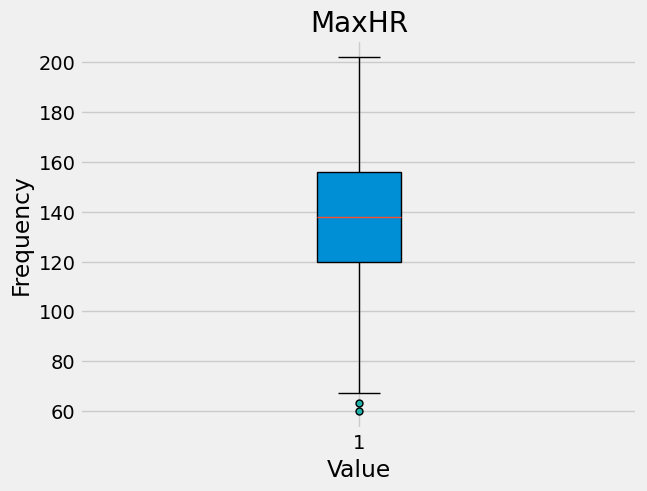

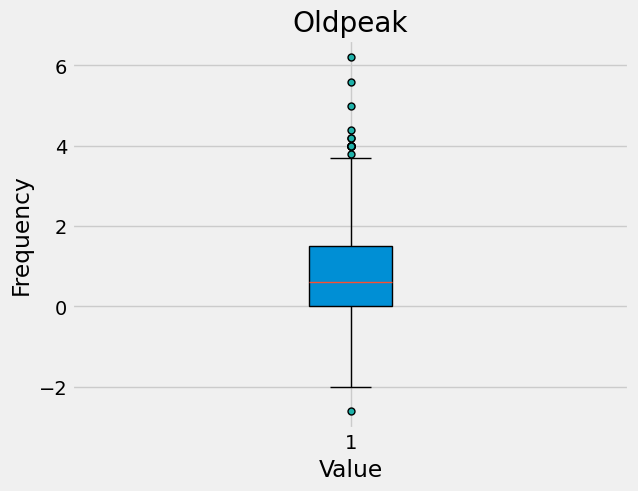

In [17]:
numerical = raw_data.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

for i in numerical:
    plt.figure()
    plt.boxplot(raw_data[i], flierprops=dict(marker='o', markersize=5, markerfacecolor='lightseagreen'), patch_artist=True)
    plt.title(i)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

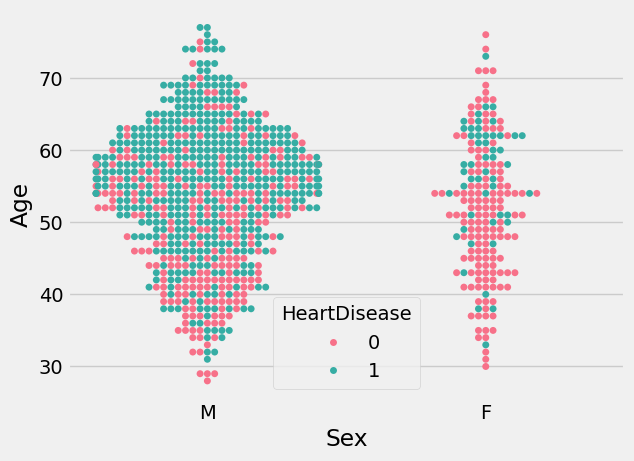

In [18]:
sns.swarmplot(y="Age", x="Sex", hue="HeartDisease", data=raw_data, palette="husl");

c:\Users\maria\.conda\envs\mda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\maria\.conda\envs\mda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


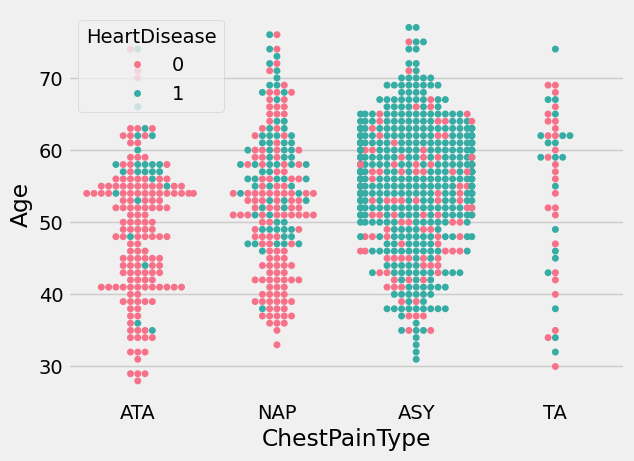

In [19]:
sns.swarmplot(y="Age", x="ChestPainType", hue="HeartDisease", data=raw_data, palette="husl");

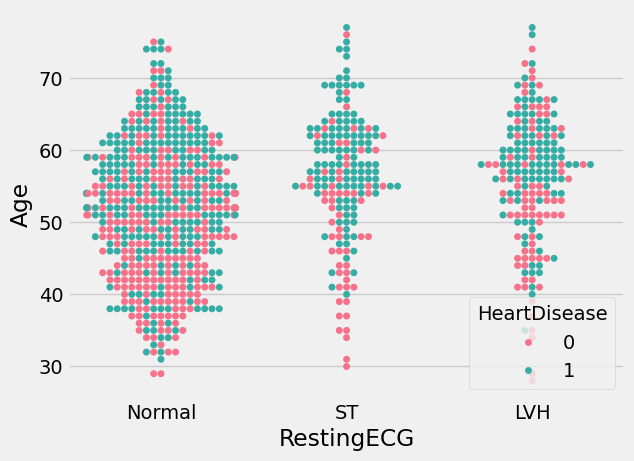

In [20]:
sns.swarmplot(y="Age", x="RestingECG", hue="HeartDisease", data=raw_data, palette="husl");

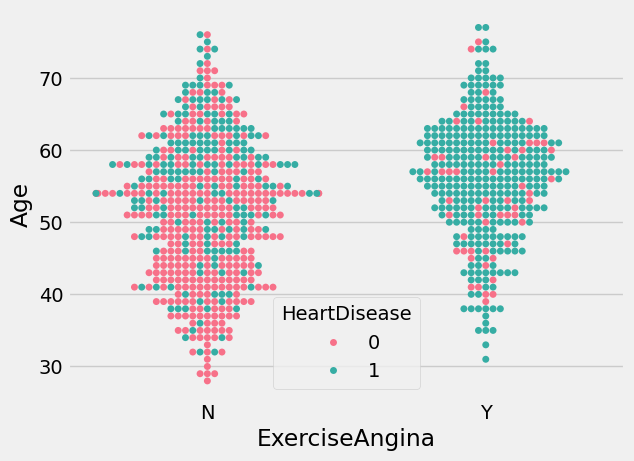

In [21]:
sns.swarmplot(y="Age", x="ExerciseAngina", hue="HeartDisease", data=raw_data, palette="husl");

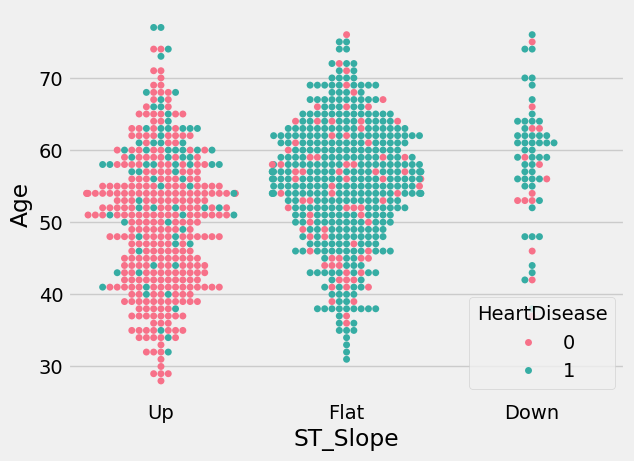

In [22]:
sns.swarmplot(y="Age", x="ST_Slope", hue="HeartDisease", data=raw_data, palette="husl");

# Data Cleaning pipeline

In [23]:
data_cleaning = make_pipeline(
    OutlierRemover(),
    DropColumnTransformer(columns=["FastingBS"]),
    ZeroToNaNTransformer(columns=["Cholesterol"]),
    CustomSimpleImputer(strategy="mean"),
    AbsTransformer(columns=["Oldpeak"])
)

df_cleaned = data_cleaning.fit_transform(raw_data)
df_cleaned

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,Normal,172.0,N,0.0,Up,0.0
1,49.0,F,NAP,160.0,180.0,Normal,156.0,N,1.0,Flat,1.0
2,37.0,M,ATA,130.0,283.0,ST,98.0,N,0.0,Up,0.0
3,48.0,F,ASY,138.0,214.0,Normal,108.0,Y,1.5,Flat,1.0
4,54.0,M,NAP,150.0,195.0,Normal,122.0,N,0.0,Up,0.0
...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110.0,264.0,Normal,132.0,N,1.2,Flat,1.0
914,68.0,M,ASY,144.0,193.0,Normal,141.0,N,3.4,Flat,1.0
915,57.0,M,ASY,130.0,131.0,Normal,115.0,Y,1.2,Flat,1.0
916,57.0,F,ATA,130.0,236.0,LVH,174.0,N,0.0,Flat,1.0


In [24]:
df_cleaned.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 899 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             899 non-null    float64
 1   Sex             899 non-null    object 
 2   ChestPainType   899 non-null    object 
 3   RestingBP       899 non-null    float64
 4   Cholesterol     899 non-null    float64
 5   RestingECG      899 non-null    object 
 6   MaxHR           899 non-null    float64
 7   ExerciseAngina  899 non-null    object 
 8   Oldpeak         899 non-null    float64
 9   ST_Slope        899 non-null    object 
 10  HeartDisease    899 non-null    float64
dtypes: float64(6), object(5)
memory usage: 84.3+ KB


# Data Preprocesssing pipeline

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned.drop(columns=["HeartDisease"]),
    df_cleaned["HeartDisease"],
    test_size=0.2,
    random_state=42,
)

In [26]:
preprocessing_pipeline = make_pipeline(
    CustomLabelEncoder(columns=["ChestPainType", "RestingECG", "ST_Slope"]),
    CustomOneHotEncoder(columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]),
    CustomStandardScaler(columns=["Age", "RestingBP", "Cholesterol", "MaxHR"]),
    CustomMinMaxScaler(columns=["Oldpeak"]))


# Logistic Regression

In [27]:
logistic_regression_pipleine = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', LogisticRegression())
])

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear'],
    'classifier__penalty': ['l1', 'l2']
}



grid_search = GridSearchCV(
    estimator=logistic_regression_pipleine,
    param_grid=param_grid,
    cv=5,                      # 5-fold cross-validation
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV ROC AUC:", grid_search.best_score_)

Best Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best CV ROC AUC: 0.9101639712147029


In [28]:
# Evaluate on test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Accuracy:", test_score)

Test Accuracy: 0.8611111111111112


# Gradient Boosting

In [29]:
gb_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

gb_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 5],
    'classifier__subsample': [0.8, 1.0]
}


gb_grid_search = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=gb_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

gb_grid_search.fit(X_train, y_train)

print("🔹 Gradient Boosting")
print("Best Params:", gb_grid_search.best_params_)
print("Best CV ROC AUC:", gb_grid_search.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
🔹 Gradient Boosting
Best Params: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}
Best CV ROC AUC: 0.920418428980039


In [30]:
gb_best_model = gb_grid_search.best_estimator_
print("Test Accuracy:", gb_best_model.score(X_test, y_test))

Test Accuracy: 0.8833333333333333


# Random Forest

In [31]:
rf_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__max_features': ['sqrt', 'log2']
}

rf_grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

rf_grid_search.fit(X_train, y_train)

print("\n🔸 Random Forest")
print("Best Params:", rf_grid_search.best_params_)
print("Best CV ROC AUC:", rf_grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits

🔸 Random Forest
Best Params: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best CV ROC AUC: 0.9205524281888996


In [32]:
rf_best_model = rf_grid_search.best_estimator_
print("Test Accuracy:", rf_best_model.score(X_test, y_test))

Test Accuracy: 0.8722222222222222



🔍 Evaluation for Gradient Boosting
ROC AUC Score: 0.9343146956952005
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.81      0.87        86
         1.0       0.85      0.95      0.89        94

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.89      0.88      0.88       180

Confusion Matrix:
 [[70 16]
 [ 5 89]]

🔍 Evaluation for Random Forest
ROC AUC Score: 0.9240475012370114
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.80      0.86        86
         1.0       0.84      0.94      0.88        94

    accuracy                           0.87       180
   macro avg       0.88      0.87      0.87       180
weighted avg       0.88      0.87      0.87       180

Confusion Matrix:
 [[69 17]
 [ 6 88]]

🔍 Evaluation for Logistic Regression
ROC AUC Score: 0.919470559129144
Classification 

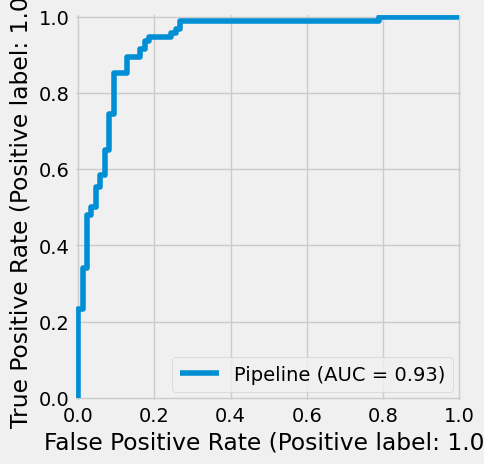

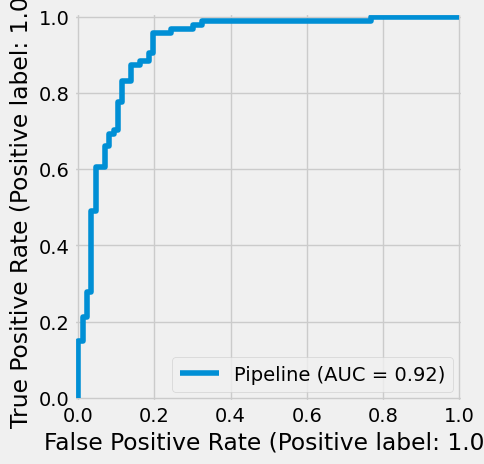

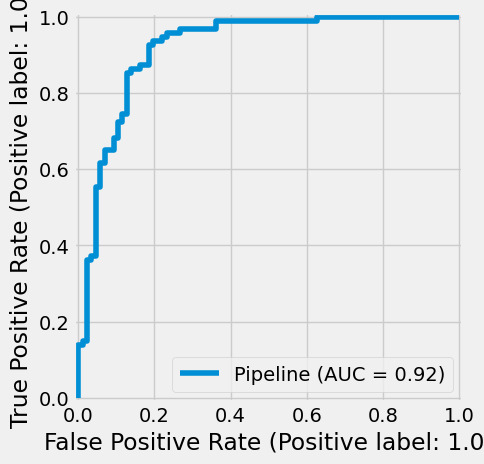

In [33]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n🔍 Evaluation for {name}")
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    RocCurveDisplay.from_estimator(model, X_test, y_test)

evaluate_model(gb_best_model, "Gradient Boosting")
evaluate_model(rf_best_model, "Random Forest")
evaluate_model(best_model, "Logistic Regression")

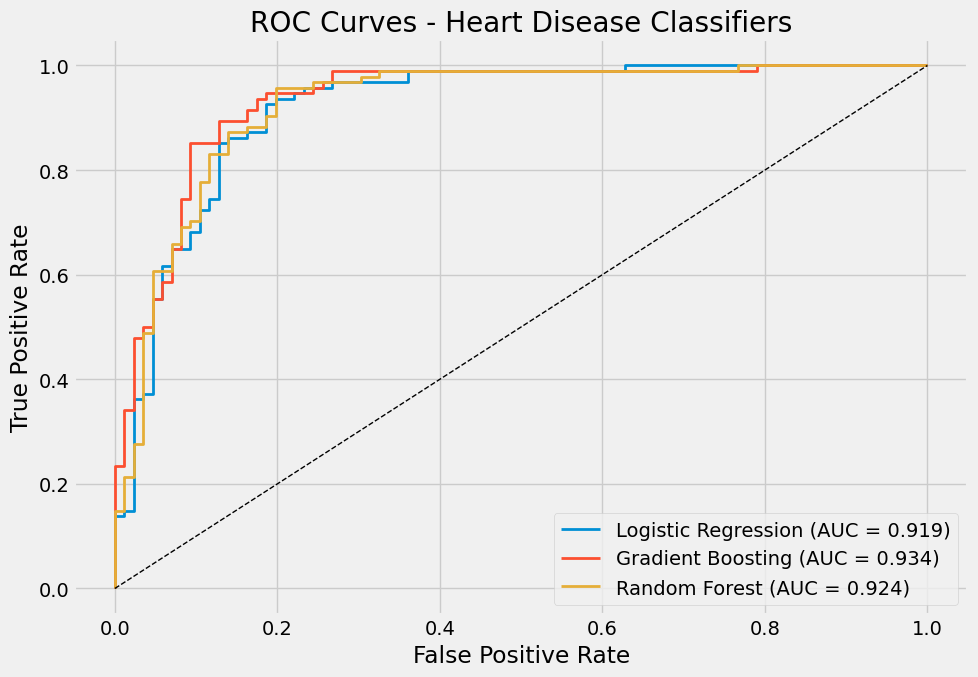

In [34]:
def get_roc(model, name):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc, name

# Collect all ROC curves
roc_data = [
    get_roc(best_model, "Logistic Regression"),
    get_roc(gb_best_model, "Gradient Boosting"),
    get_roc(rf_best_model, "Random Forest"),
]

plt.figure(figsize=(10, 7))
for fpr, tpr, roc_auc, label in roc_data:
    plt.plot(fpr, tpr, lw=2, label=f"{label} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Heart Disease Classifiers")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

## Final Thoughts

In this project, I explored different machine learning models to predict the likelihood of heart disease based on patient data. The models I chose were:


- **Logistic Regression**  
  I chose this as a baseline model. It’s simple, fast, and interpretable, which in my opinion makes it a great starting point in any classification task.

- **Gradient Boosting**  
  This model is great at capturing complex patterns and relationships in the data. It builds trees sequentially, improving performance with each step, which often leads to very high accuracy in structured datasets like this one.

- **Random Forest**  
  This ensemble model is known for being robust and less likely to overfit. It combines multiple decision trees and averages them, making it a strong performer, especially when there are both categorical and numerical features involved.

---

### Results summary

| Model               | Accuracy | AUC Score | Notes                         |
|---------------------|----------|-----------|-------------------------------|
| Logistic Regression | 86.1%    | 0.919     | High recall, strong baseline |
| Random Forest       | 87.2%    | 0.924     | Balanced performance, low overfitting |
| Gradient Boosting   | **88.3%**| **0.934** | Best model overall            |

---

### In conclusion:

All three models performed well, but Gradient Boosting came out on top with the highest AUC score and accuracy. It managed to capture the patterns in the data better than the others while maintaining good generalization. This suggests that Gradient Boosting would be the best choice for helping to identify patients at risk of heart disease early on.
